Netflix


Import

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Settings

In [61]:
pd.set_option('display.max_columns', None)

Reading csv

In [62]:
df = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')

In [63]:
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,NaN,01 Oct 2016,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,4.0,NaN,22 Sep 2011,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


Discovering

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [65]:
df.isnull().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
dtype: int64

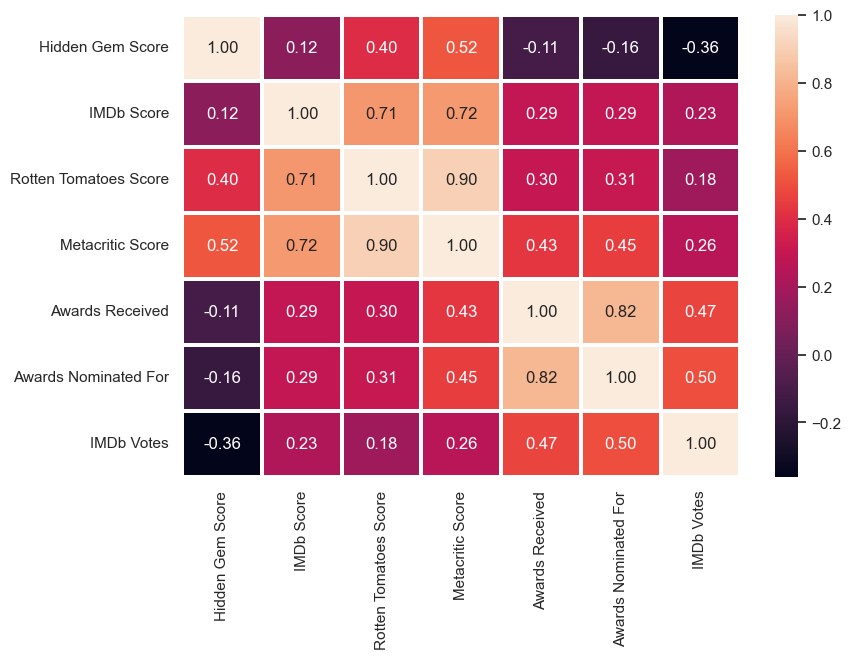

In [66]:
#correlation heatmap
corr = df.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()


In [67]:
#drop duplicates
df = df.drop_duplicates(subset='Title')

In [68]:
#change date of release format
df['Release Date']= pd.to_datetime(df['Release Date'])
df['Netflix Release Date']= pd.to_datetime(df['Netflix Release Date'])

In [69]:
#renaming columns
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

1.Series vs Films

In [70]:
svf = df.series_or_movie.value_counts().reset_index()
svf

,index,series_or_movie
0,Movie,11406
1,Series,3665


<AxesSubplot:xlabel='index', ylabel='series_or_movie'>

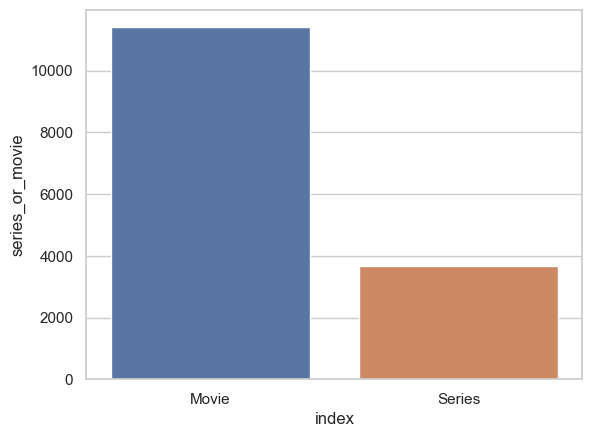

In [71]:
sns.set_theme(style="whitegrid")
sns.barplot(data = svf, x='index', y='series_or_movie',)


2.Ganres

In [72]:
df_series_gen = df.dropna(subset=['genre'])


In [94]:
genreslist = df_series_gen.genre.str.split(',').replace(' ','')
genreslist

0        [Crime,  Drama,  Fantasy,  Horror,  Romance]
1                                            [Comedy]
2                                  [Drama,  Thriller]
3                                             [Drama]
4                         [Animation,  Short,  Drama]
                             ...                     
15467                           [Documentary,  Music]
15473                                        [Comedy]
15477                   [Animation,  Comedy,  Family]
15478                   [Animation,  Comedy,  Family]
15479          [Animation,  Action,  Comedy,  Family]
Name: genre, Length: 13365, dtype: object

In [95]:
#Creating list that counting genres
gen_list={}
for genres in genreslist:
    for genre in genres:
        if genre in gen_list:
            gen_list[genre]+=1
        else:
            gen_list[genre]=1
genres_count=pd.DataFrame.from_dict(gen_list, orient='index')
genres_count = genres_count.reset_index().rename(columns={'index':'genre',0:'colvo'})
genres_count = genres_count.sort_values(by='colvo', ascending=False)
genres_count = genres_count[genres_count.colvo > 10]

<AxesSubplot:xlabel='colvo', ylabel='genre'>

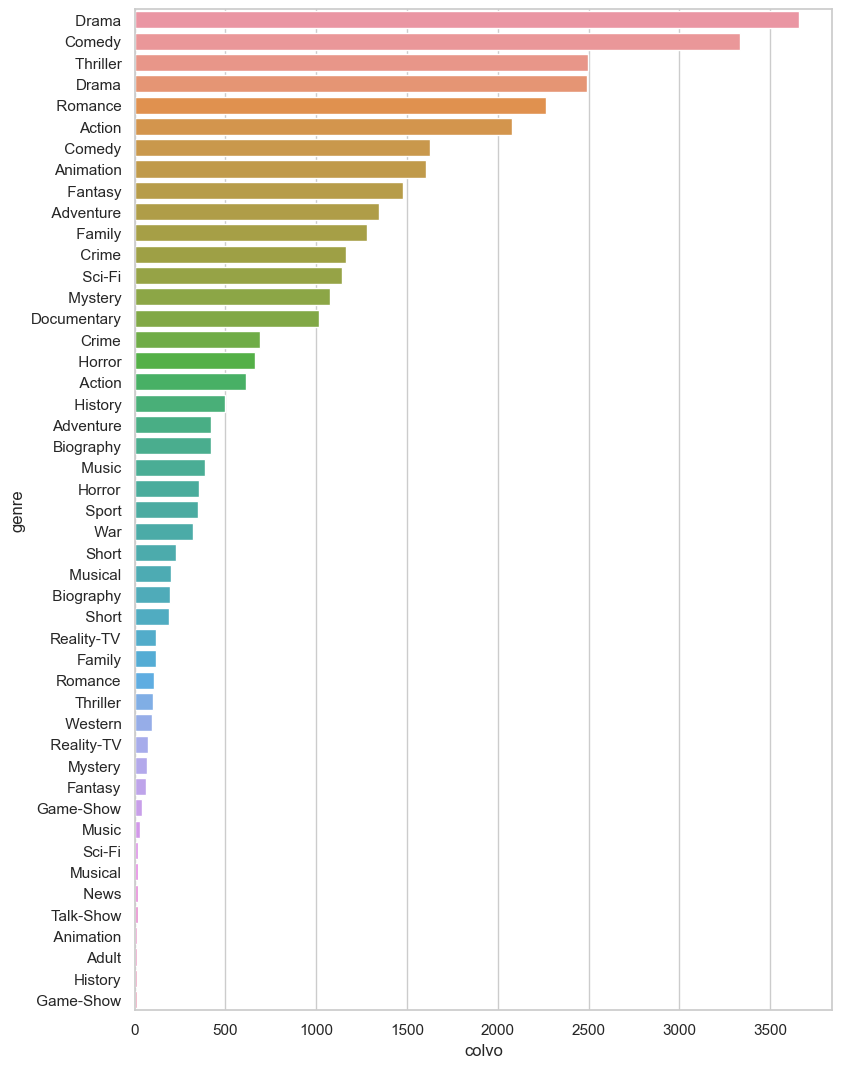

In [96]:
fig = plt.gcf()
fig.set_size_inches(9, 13)
sns.barplot(data = genres_count, y='genre', x='colvo', orient='h')


3.Most popolar languages

In [76]:
languages = df.languages.dropna().str.replace(' ','')
languages = languages.str.split(',')
lang_list={}
for langes in languages:
    for lange in langes:
        if lange in lang_list:
            lang_list[lange]+=1
        else:
            lang_list[lange]=1
lang_list

{'Swedish': 171,
 'Spanish': 1113,
 'English': 7774,
 'Turkish': 172,
 'Thai': 196,
 'Polish': 184,
 'German': 665,
 'Norwegian': 83,
 'Scanian': 1,
 'Sanskrit': 18,
 'Japanese': 1604,
 'Hindi': 526,
 'Cantonese': 291,
 'Mandarin': 471,
 'French': 1013,
 'Italian': 473,
 'Breton': 1,
 'Korean': 708,
 'Tibetan': 6,
 'Russian': 321,
 'Chinese': 132,
 'Aboriginal': 10,
 'Danish': 121,
 'Czech': 148,
 'Ukrainian': 47,
 'Romanian': 108,
 'None': 40,
 'Hungarian': 64,
 'SwissGerman': 9,
 'Latin': 93,
 'Greek': 42,
 'Vietnamese': 33,
 'Kannada': 9,
 'Luxembourgish': 3,
 'Indonesian': 97,
 'Portuguese': 253,
 'MinNan': 28,
 'Bengali': 29,
 'Arabic': 294,
 'Yiddish': 25,
 'Filipino': 91,
 'Malayalam': 47,
 'Romany': 8,
 'AmericanSignLanguage': 26,
 'Quechua': 6,
 'Dutch': 180,
 'Khmer': 9,
 'Hokkien': 27,
 'Tagalog': 85,
 'Persian': 27,
 'Uzbek': 2,
 'Basque': 13,
 'Hebrew': 86,
 'Urdu': 47,
 'Gallegan': 2,
 'Finnish': 24,
 'Malay': 59,
 'SignLanguages': 7,
 'Georgian': 10,
 'Tamil': 83,
 'Zulu

In [77]:
lang_df = pd.DataFrame.from_dict(lang_list, orient='index')
lang_df = lang_df.reset_index().rename(columns={'index':'language',0:'col'})
lang_df = lang_df[lang_df.col>20]
lang_df = lang_df.drop_duplicates().sort_values(by='col', ascending=False)

In [97]:
#fig = plt.gcf()
#fig.set_size_inches(9, 13)
#sns.barplot(data = lang_df, y='language', x='col', orient='h')

In [79]:
px.treemap(data_frame=lang_df, path=['language'], values='col')

4.Top 10 Hidden gems
When not many people watched it, but it has good rating 

In [80]:
hidden_gems = df.dropna(subset=['hidden_gem_score'])
hidden_gems = hidden_gems[['title','genre','hidden_gem_score']].sort_values(by='hidden_gem_score', ascending=False)
top10g = hidden_gems[:10].reset_index(drop=True)
top10g
print('Top 10 hiiden gems of Netflix\n', top10g)

Top 10 hiiden gems of Netflix
                  title                      genre  hidden_gem_score
0          No Festival         Documentary, Music               9.8
1        Horsin Around                     Family               9.7
2      The Dream House     Comedy, Drama, Fantasy               9.7
3  A Lion in the House                Documentary               9.6
4             Im Sorry                Documentary               9.6
5           Conspiracy         Documentary, Short               9.6
6  Flavours of Romania                Documentary               9.6
7     The Last Animals                Documentary               9.5
8         Numberblocks                  Animation               9.5
9             Stranger  Documentary, Drama, Sport               9.5


5.Directors 

In [81]:
df.head()

,title,genre,tags,languages,series_or_movie,hidden_gem_score,country_availability,runtime,director,writer,actors,view_rating,imdb_score,rotten_tomatoes_score,metacritic_score,awards_received,awards_nominated_for,boxoffice,release_date,netflix_release_date,production_house,netflix_link,imdb_link,summary,imdb_votes,image,poster,tmdb_trailer,trailer_site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",2008-12-12,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",2020-05-08,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",2020-08-28,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,NaN,2016-10-01,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,4.0,NaN,2011-09-22,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [82]:
director_df = df.dropna(subset='director')
director_df = director_df.director.str.split(', ')
dir_list={}
for directors in director_df:
    for director in directors:
        if director in dir_list:
            dir_list[director]+=1
        else:
            dir_list[director]=1
director_df = pd.DataFrame.from_dict(dir_list, orient='index')
director_df = director_df.reset_index().rename(columns={'index':'director',0:'col'}).sort_values(by='col', ascending=False)
director_df = director_df.head(10)
director_df

,director,col
553,Steven Spielberg,25
195,Johnnie To,21
2524,Jing Wong,21
4512,Raúl Campos,19
4513,Jan Suter,19
36,Woody Allen,18
23,Ishirô Honda,18
1978,Marcus Raboy,17
2126,Jay Karas,16
5052,Pedro Almodóvar,16


Now we know TOP 10 directors by count of their films on Netflix, lets discover some more

In [113]:
top10director_df = director_df.merge(df, how='left', on='director')
top10director_df = top10director_df[['director', 'title', 'genre','series_or_movie','imdb_score','awards_received','boxoffice','col']].rename(columns={'col':'count_of_films'})
top10director_df

,director,title,genre,series_or_movie,imdb_score,awards_received,boxoffice,count_of_films
0,Steven Spielberg,Me & You vs The World,"Biography, Crime, Drama",Movie,8.1,16.0,"$164,615,351",25
1,Steven Spielberg,Hook,"Adventure, Comedy, Family, Fantasy",Series,6.8,7.0,"$119,654,823",25
2,Steven Spielberg,The Post,Drama,Movie,7.2,20.0,"$81,903,458",25
3,Steven Spielberg,Ready Player One,"Action, Adventure, Sci-Fi",Movie,7.5,11.0,"$137,690,172",25
4,Steven Spielberg,The Terminal,"Comedy, Drama, Romance",Series,7.4,7.0,"$77,872,883",25
...,...,...,...,...,...,...,...,...
130,Pedro Almodóvar,Tie Me Up! Tie Me Down!,"Comedy, Crime, Drama, Romance",Movie,7.0,8.0,"$4,087,361",16
131,Pedro Almodóvar,All About My Mother,Drama,Movie,7.8,58.0,"$8,344,738",16
132,Pedro Almodóvar,Im So Excited,Comedy,Movie,5.6,3.0,"$1,368,119",16
133,Pedro Almodóvar,Volver,"Comedy, Drama",Movie,7.6,61.0,"$12,899,867",16


Grouped by directors avg of imdb_score

In [114]:
top10director_df.groupby('director').agg({'imdb_score' : 'mean', 'boxoffice' : 'sum'}).sort_values(by='imdb_score',ascending=False).reset_index()
#problem with boxoffice data type

,director,imdb_score,boxoffice
0,Steven Spielberg,7.568000,"$164,615,351$119,654,823$81,903,458$137,690,17..."
1,Pedro Almodóvar,7.162500,"$1,785,901$1,104,622$5,284,284$72,442$1,710,05..."
2,Jay Karas,6.986667,0
3,Woody Allen,6.833333,"$7,331,647$18,344,729$1,404,061$9,077,269$11,1..."
4,Johnnie To,6.594118,"$55,758$119,550$63,675$51,957"
5,Marcus Raboy,6.505882,"$33,253,609"
6,Jing Wong,6.381250,0
7,Ishirô Honda,6.211111,"$975,000$500,000"
8,Jan Suter,NaN,0
9,Raúl Campos,NaN,0


In [115]:
top10director_df["boxoffice"] = top10director_df["boxoffice"].replace("[$,]", "", regex=True).astype(float)
top10director_df["boxoffice"] = top10director_df["boxoffice"].fillna(0)
top10director_df["awards_received"] = top10director_df["awards_received"].fillna(0)
top10director_df.boxoffice = top10director_df.boxoffice.astype(int)
top10director_df

,director,title,genre,series_or_movie,imdb_score,awards_received,boxoffice,count_of_films
0,Steven Spielberg,Me & You vs The World,"Biography, Crime, Drama",Movie,8.1,16.0,164615351,25
1,Steven Spielberg,Hook,"Adventure, Comedy, Family, Fantasy",Series,6.8,7.0,119654823,25
2,Steven Spielberg,The Post,Drama,Movie,7.2,20.0,81903458,25
3,Steven Spielberg,Ready Player One,"Action, Adventure, Sci-Fi",Movie,7.5,11.0,137690172,25
4,Steven Spielberg,The Terminal,"Comedy, Drama, Romance",Series,7.4,7.0,77872883,25
...,...,...,...,...,...,...,...,...
130,Pedro Almodóvar,Tie Me Up! Tie Me Down!,"Comedy, Crime, Drama, Romance",Movie,7.0,8.0,4087361,16
131,Pedro Almodóvar,All About My Mother,Drama,Movie,7.8,58.0,8344738,16
132,Pedro Almodóvar,Im So Excited,Comedy,Movie,5.6,3.0,1368119,16
133,Pedro Almodóvar,Volver,"Comedy, Drama",Movie,7.6,61.0,12899867,16


In [116]:
top10director_df.groupby('director').agg({'imdb_score' : 'mean', 'boxoffice' : 'max', 'awards_received': 'sum'}).sort_values(by='imdb_score',ascending=False).reset_index()

,director,imdb_score,boxoffice,awards_received
0,Steven Spielberg,7.568000,435110554,674.0
1,Pedro Almodóvar,7.162500,12899867,301.0
2,Jay Karas,6.986667,0,0.0
3,Woody Allen,6.833333,56817045,135.0
4,Johnnie To,6.594118,119550,67.0
5,Marcus Raboy,6.505882,33253609,0.0
6,Jing Wong,6.381250,0,0.0
7,Ishirô Honda,6.211111,975000,0.0
8,Jan Suter,NaN,0,0.0
9,Raúl Campos,NaN,0,0.0


<AxesSubplot:xlabel='director', ylabel='imdb_score'>

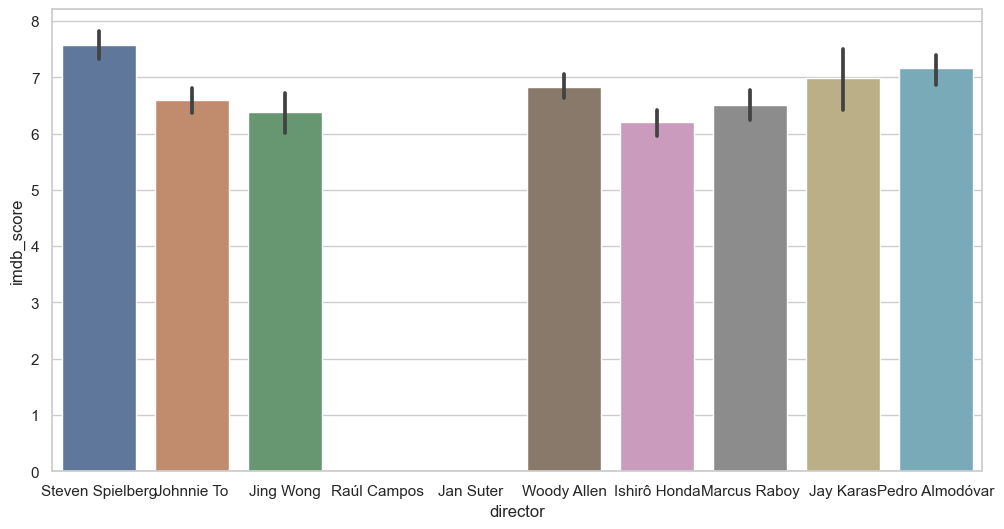

In [117]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
sns.barplot(data = top10director_df, x='director', y='imdb_score', saturation=0.6)